In [44]:
import glob
import os
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd

# Load the contents
with open("train_metrics_20250830_1615.jsonl", "r") as f:
    train_metrics = [json.loads(line) for line in f]

# Load the contents
with open("hellaswag_eval_20250830_1615.jsonl", "r") as f:
    hellaswag = [json.loads(line) for line in f]

In [ ]:
df_metrics = pd.DataFrame(train_metrics)
df_metrics = df_metrics.merge(pd.DataFrame(hellaswag), on="step", how="left")
df_metrics

,step,loss,norm,tokens_per_second,lr,shard_index
0,0,11.075100,6.185601,1008.889382,0.000100,0
1,5,9.193068,1.955069,145614.169808,0.000100,0
2,10,8.762844,1.676361,146173.087815,0.000100,0
3,15,8.361808,1.145759,148238.898416,0.000100,0
4,20,7.912164,1.048116,145647.500980,0.000100,0
...,...,...,...,...,...,...
2050,10155,3.742332,0.735807,142771.912728,0.000099,0
2051,10160,3.672186,0.759304,141697.969336,0.000099,0
2052,10165,3.808067,0.791425,141603.950467,0.000099,0
2053,10170,3.657206,0.738237,142491.561760,0.000099,0


,step,loss,norm,tokens_per_second,lr,shard_index,loss_smooth,hellaswag_acc
0,0,11.075100,6.185601,1008.889382,0.000100,0,11.075100,NaN
1,5,9.193068,1.955069,145614.169808,0.000100,0,10.134084,NaN
2,10,8.762844,1.676361,146173.087815,0.000100,0,9.677004,NaN
3,15,8.361808,1.145759,148238.898416,0.000100,0,9.348205,NaN
4,20,7.912164,1.048116,145647.500980,0.000100,0,9.060997,NaN
...,...,...,...,...,...,...,...,...
2050,10155,3.742332,0.735807,142771.912728,0.000099,0,3.934169,NaN
2051,10160,3.672186,0.759304,141697.969336,0.000099,0,3.933084,NaN
2052,10165,3.808067,0.791425,141603.950467,0.000099,0,3.932456,NaN
2053,10170,3.657206,0.738237,142491.561760,0.000099,0,3.931726,NaN


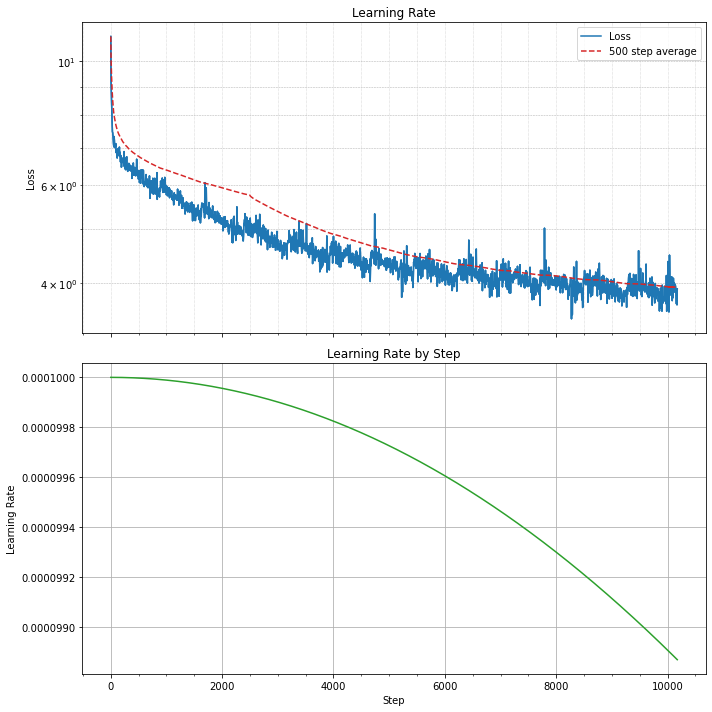

In [37]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Add a smoothed loss column using rolling mean
df_metrics['loss_smooth'] = df_metrics['loss'].rolling(window=500, min_periods=1).mean()

# Plot the smoothed loss line
# Plot the smoothed loss line above the loss
line_loss = ax1.plot(df_metrics['step'], df_metrics['loss'], color='tab:blue', label='Loss')
line_smooth = ax1.plot(df_metrics['step'], df_metrics['loss_smooth'], color='tab:red', linestyle='--', label='500 step average', zorder=3)
ax1.legend()
ax1.yaxis.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.xaxis.set_major_locator(mticker.AutoLocator())
ax1.xaxis.set_minor_locator(mticker.AutoMinorLocator())
ax1.xaxis.grid(True, which='both', linestyle=':', linewidth=0.5)
# ax1.set_ylim(0, 6)
ax1.set_yscale('log')  # Set y-axis to logarithmic scale for better visibility



# Plot Loss
ax1.plot(df_metrics['step'], df_metrics['loss'], color='tab:blue', label='Loss')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss')
ax1.grid(True)

# Plot Learning Rate

ax1.set_title('Learning Rate')
ax2.plot(df_metrics['step'], df_metrics['lr'], color='tab:green')
ax2.set_xlabel('Step')
ax2.set_ylabel('Learning Rate')
ax2.set_title('Learning Rate by Step')
ax2.grid(True)
# ax2.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0e'))

plt.tight_layout()
plt.show()
